# Kr Map with Toy Data

The NB:

   * Generates toy Kr data

   * Creates a KrMap with the calibration 

   * Applies the correction to the Kr data
   
   * Test the goodness of the coorection   

J. A Hernando, C. Herves

First   vertion, March 2022;
Current version, March 2024

In [441]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

In [431]:
from collections import namedtuple
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [432]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

import nana.kr.krana     as krana

In [433]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Sat Mar  2 19:02:02 2024


## Generate Kr Toy Data

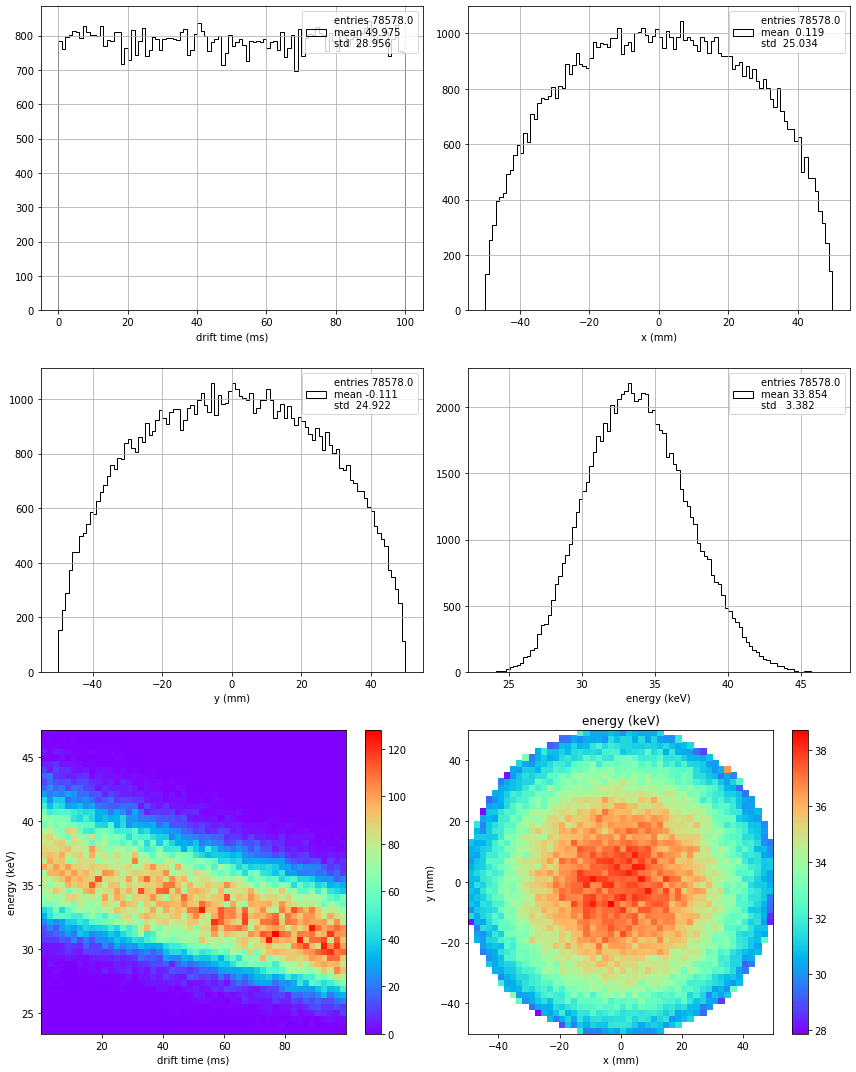

In [434]:
# Generate a Toy Kr sample
df = krana.generate_kr_toy(tau = 500., beta = 0.2, x0 = 0., y0 = 0.)
krana.plot_data(df, 50)

# Kr Map Code

In [435]:
def plot_gauss(residuals, xlabel = ""):
    pltext.canvas(1, 1);
    xsel = ~np.isnan(residuals)
    pltext.hist(residuals[xsel], 100);
    pltext.hfit(residuals[xsel], 100, fun = 'gaus');
    plt.xlabel(xlabel);
    return

def bins_radius(nbins, radius = 1.):
    bins = radius * np.array([np.sqrt(i/nbins) for i in range(nbins+1)])
    return bins

In [436]:
def run(df, coordinates = 'cartesian', bins = (20, 20), counts_min = 10, kr_fit_type = 'loge'):
    krmap_creator    = krana.configure_krmap_creator(coordinates, bins, counts_min, kr_fit_type)
    krmap, residuals = krmap_creator(df) 
    cene             = krana.krmap_scale_(df, krmap, scale = 41.5)
    return krmap, residuals, cene

def plot_run(df, krmap, residuals, corrected_energy):
    stats = ('counts', 'e0', 'lt', 'ue0', 'ult', 'cov', 'success', 'sigma', 'chi2', 'pvalue', 'par_0', 'par_1')
    coornames = ('x', 'y') 
    if krmap.coordenates == 'polar': coornames = ('r', 'phi')
    prof.plot_profile(krmap, stats = stats, coornames = coornames)
    plot_gauss(residuals, 'normalized residuals')
    plot_gauss(corrected_energy, 'corrected energy (keV)')
    xdf = df.copy()
    xdf['energy'] = corrected_energy
    xsel = ut.in_range(corrected_energy, (20, 50))
    krana.plot_data(xdf[xsel], 50)
    krana.plot_energy_profiles(xdf[xsel], nbins = 100)
    return
    

## Create Map

In [437]:
coordinates = 'cartesian' # cartesian, polar
bins        = (40, 40)
counts_min  = 20
kr_fit_type = 'loge'   # exp, loge, sline
krmap, residuals, cene = run(df, coordinates, bins, counts_min, kr_fit_type);

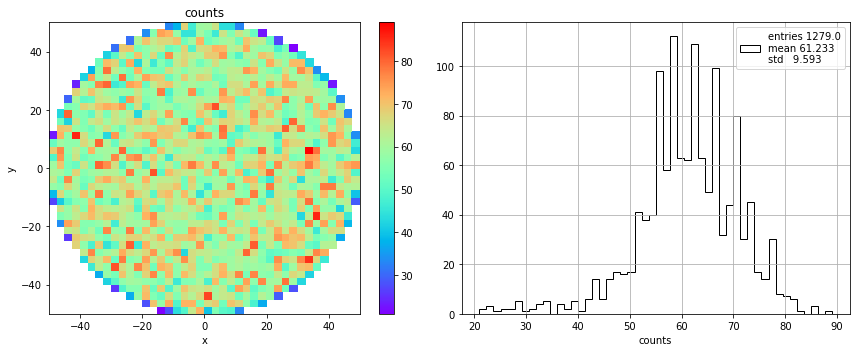

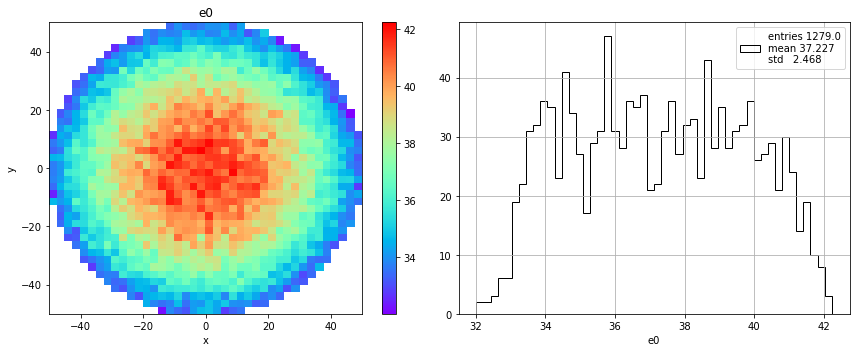

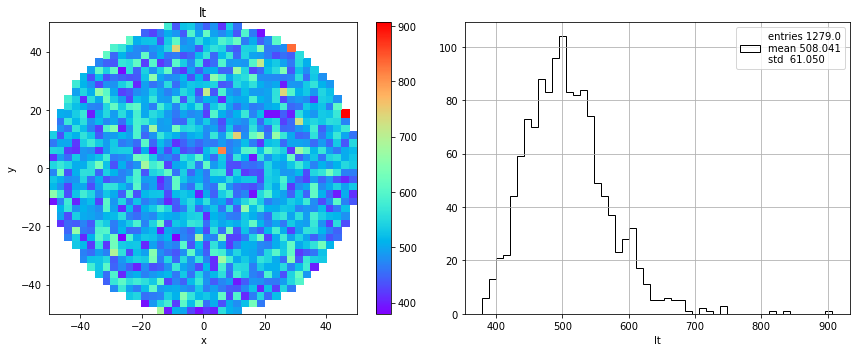

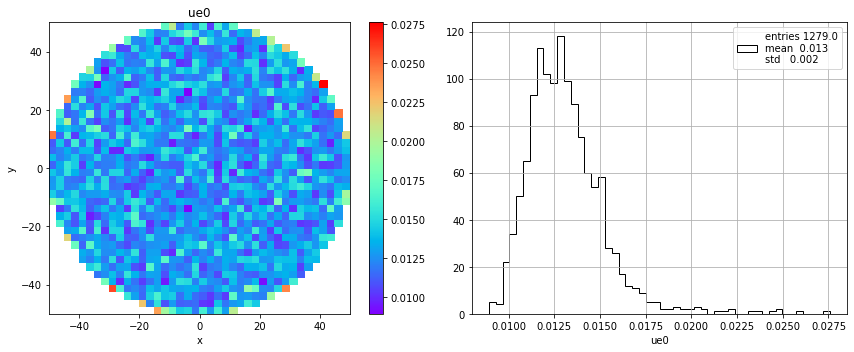

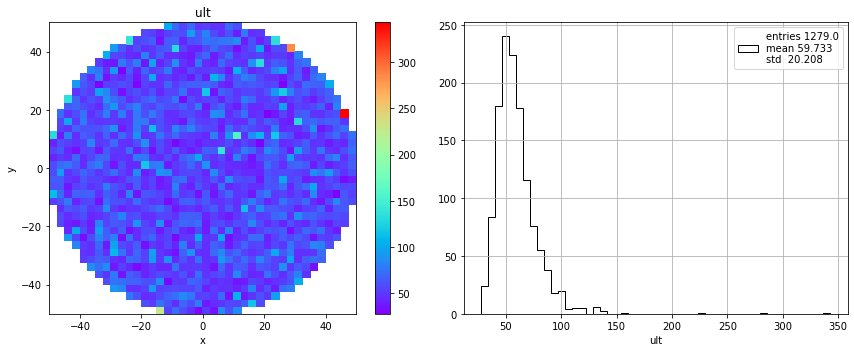

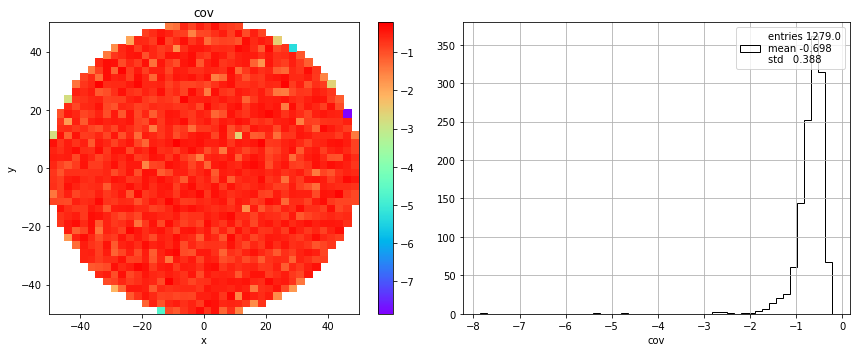

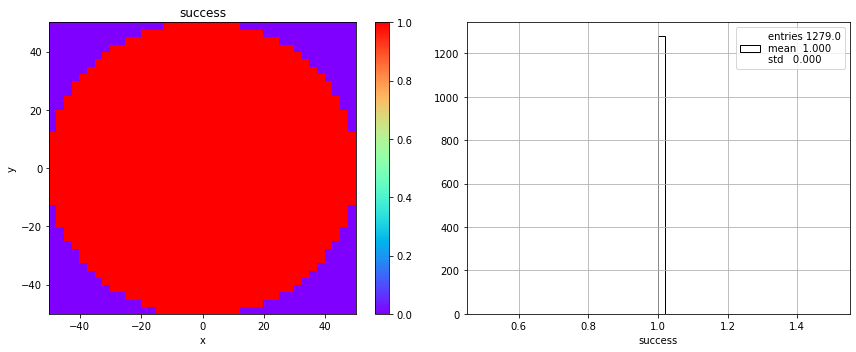

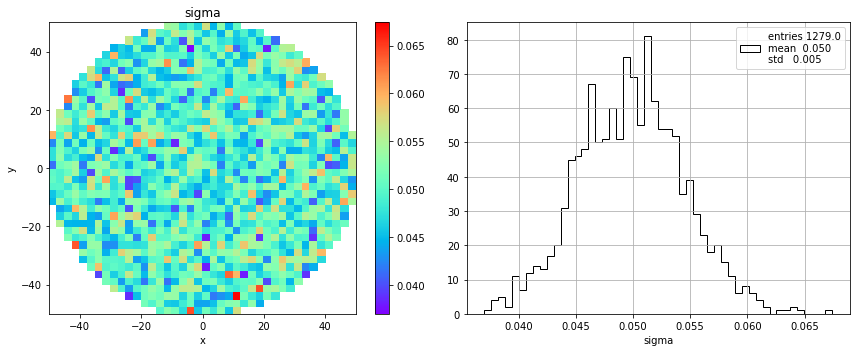

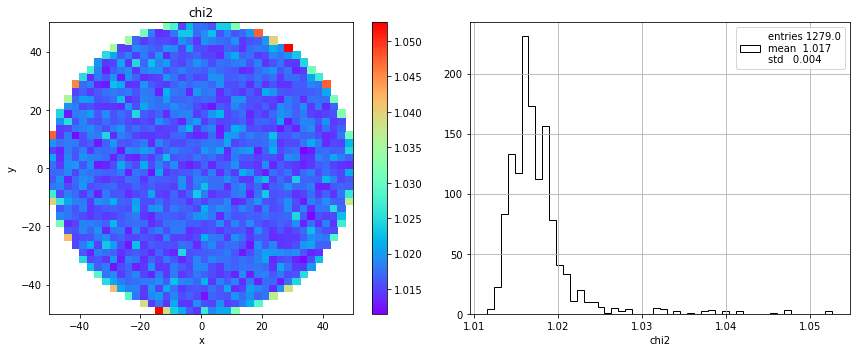

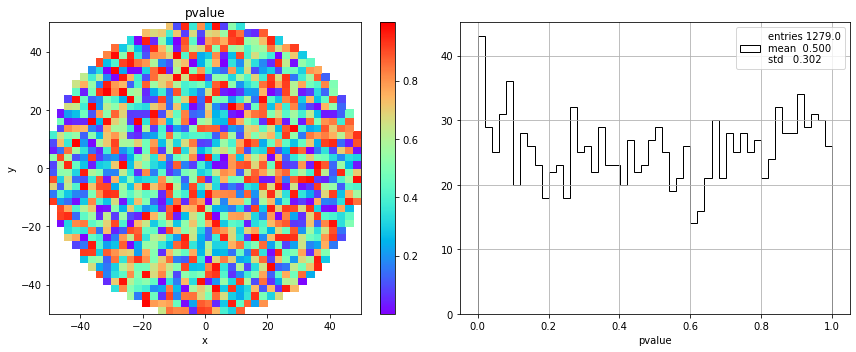

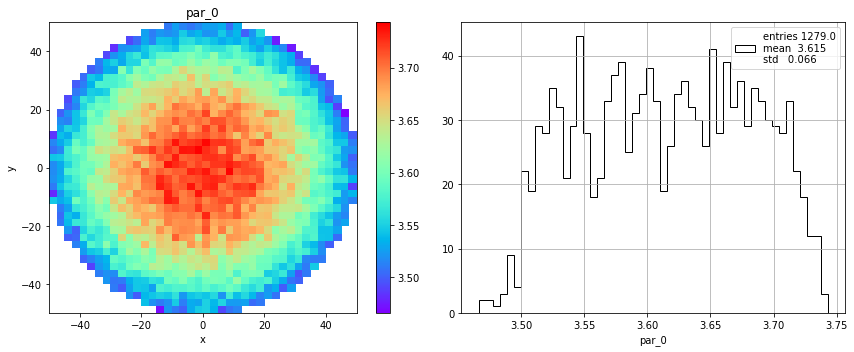

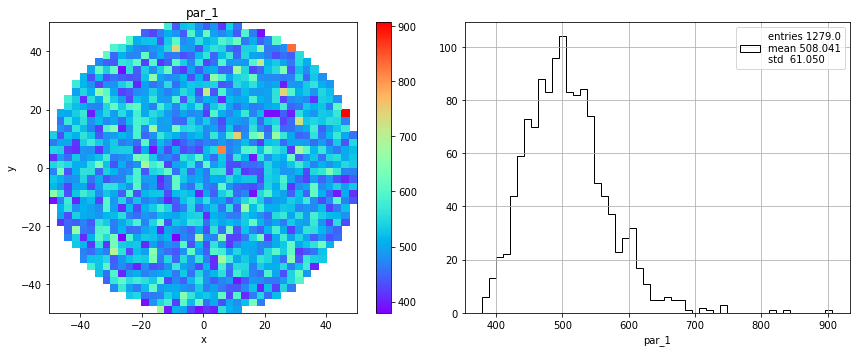

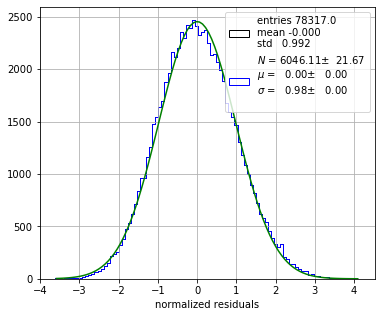

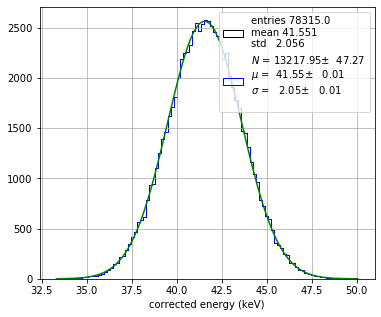

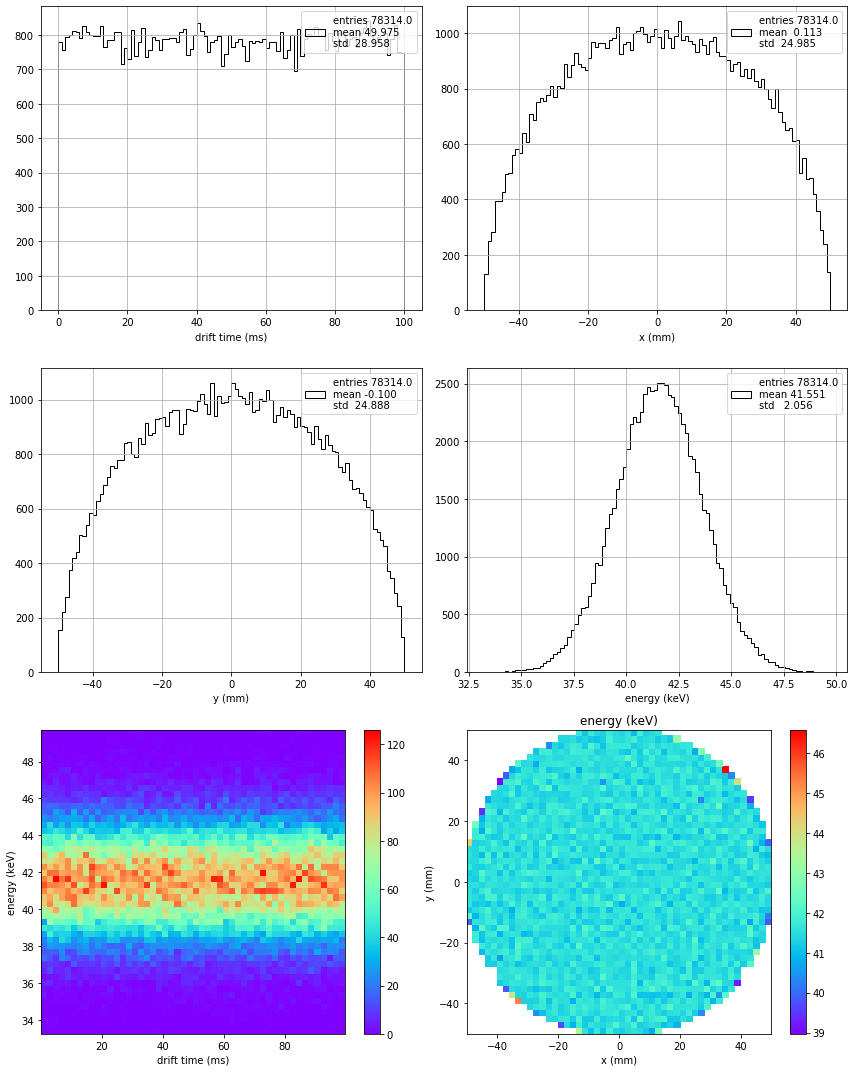

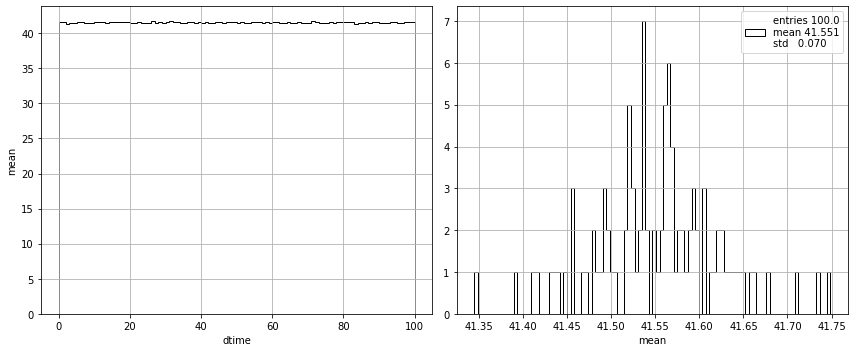

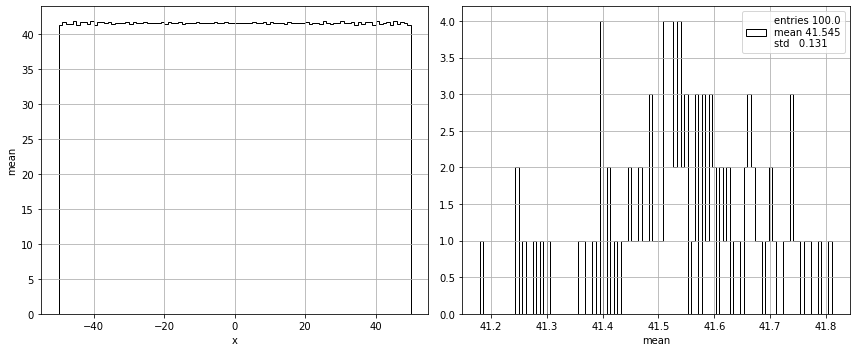

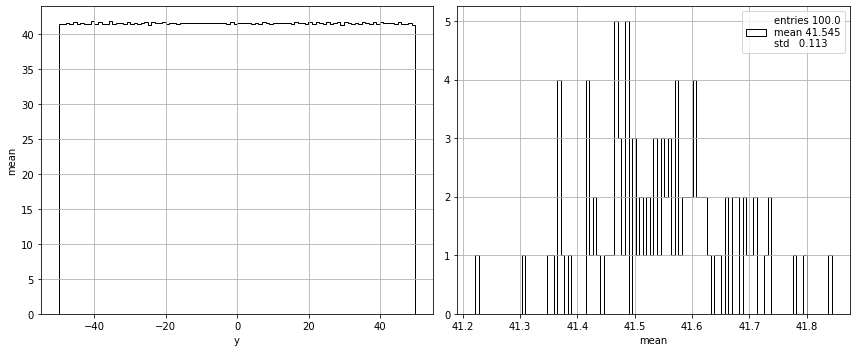

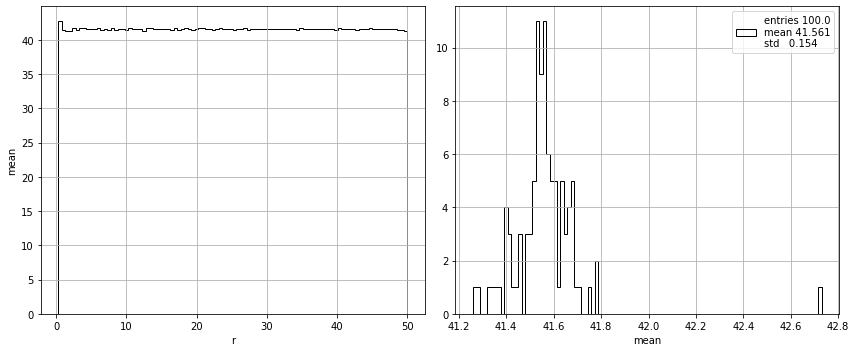

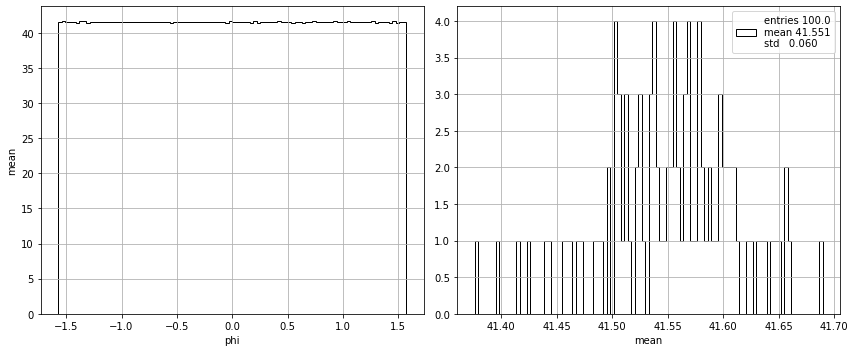

In [438]:
plot_run(df, krmap, residuals, cene)

## Run with Polar coordinates

In [439]:
coordinates = 'polar'
nbins       = 30
rmax        = 50.
bins        = (bins_radius(nbins, rmax), nbins)
counts_min  = 20
kr_fit_type = 'loge'
krmap, residuals, cene = run(df, coordinates, bins, counts_min, kr_fit_type);

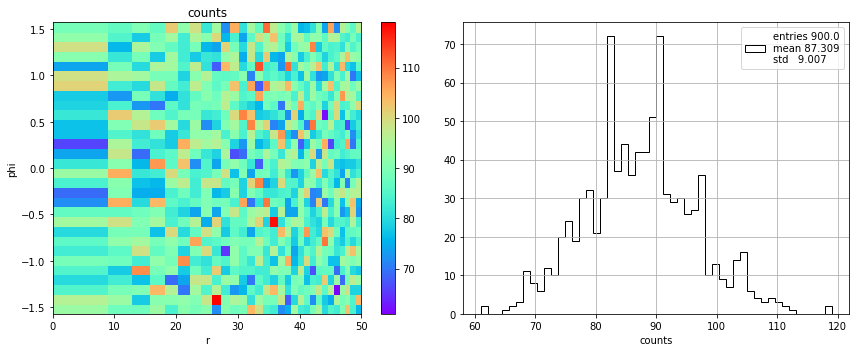

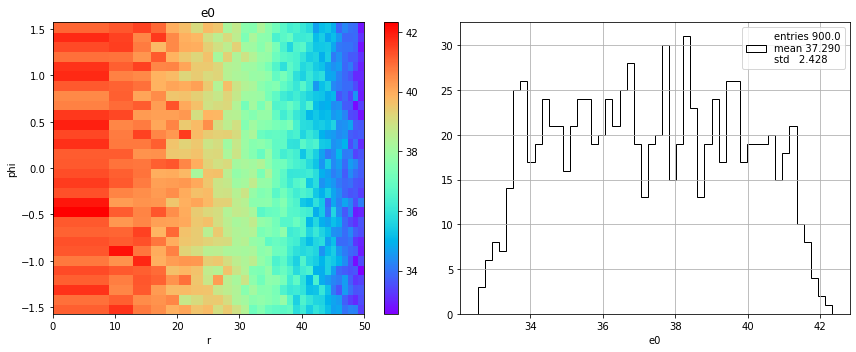

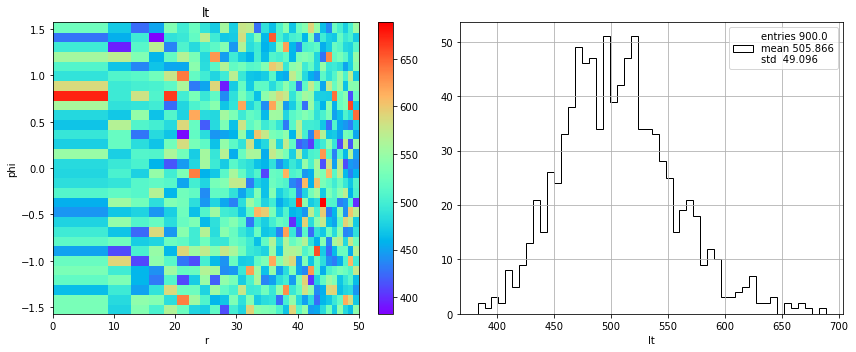

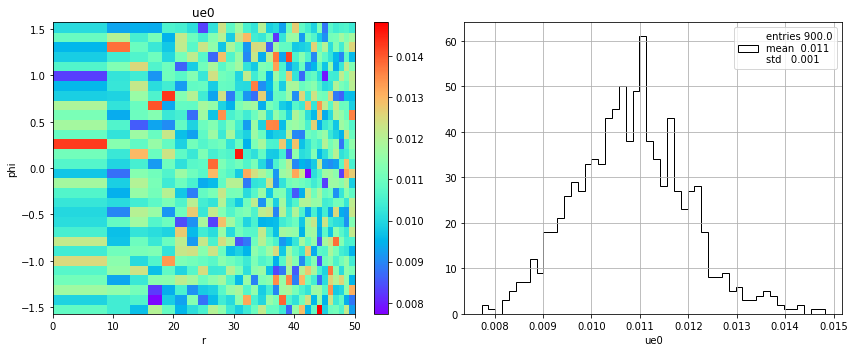

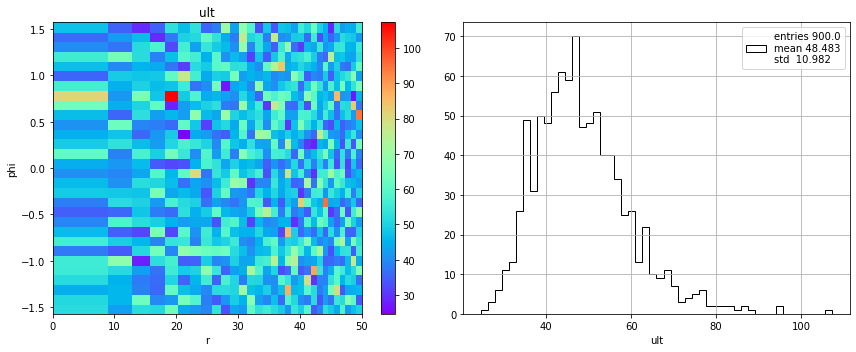

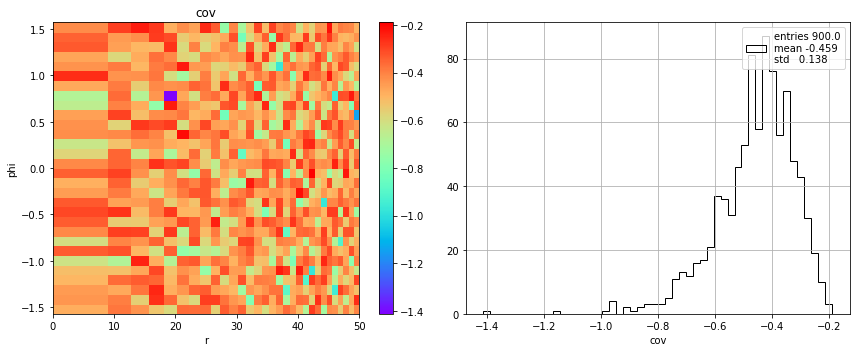

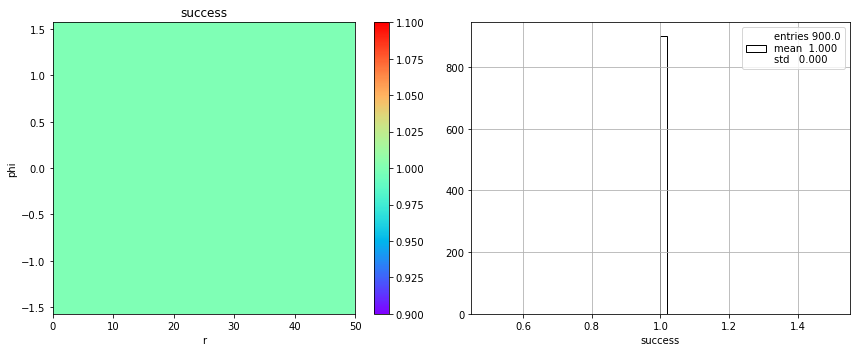

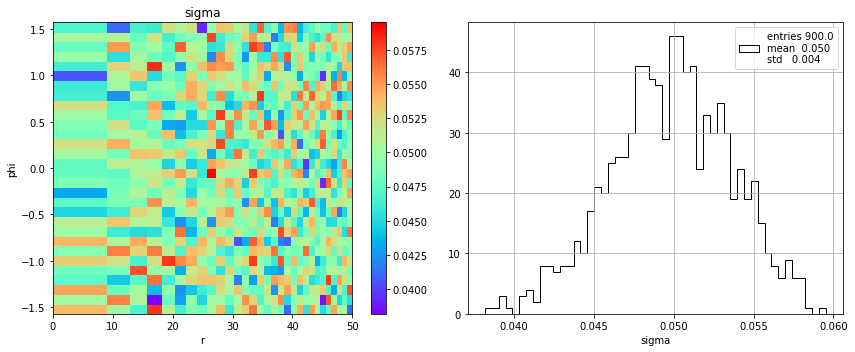

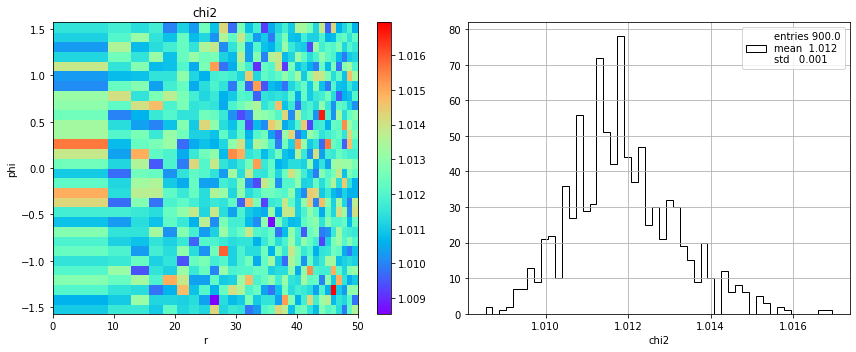

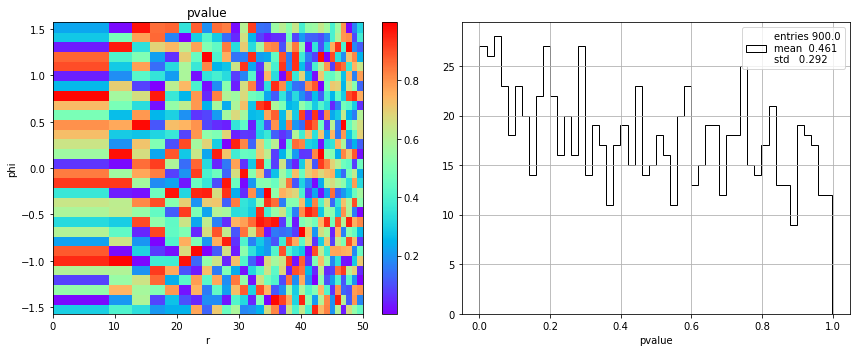

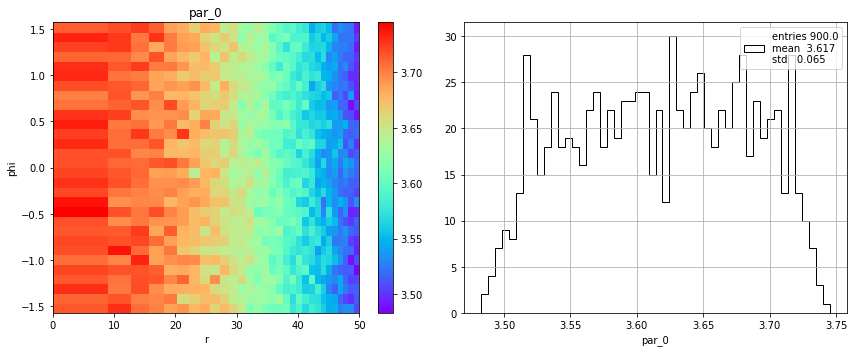

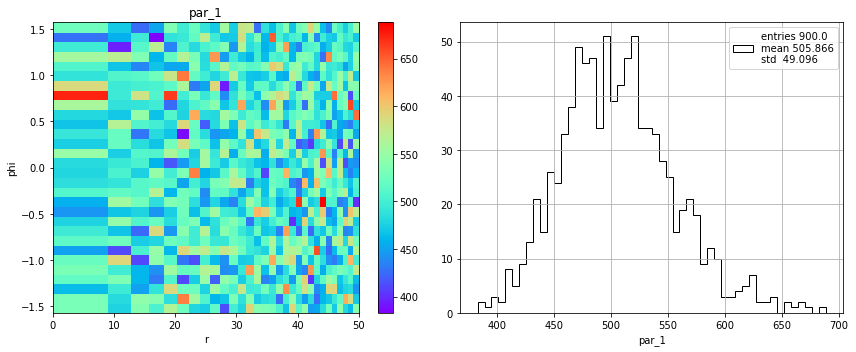

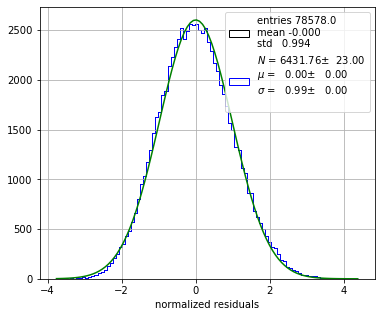

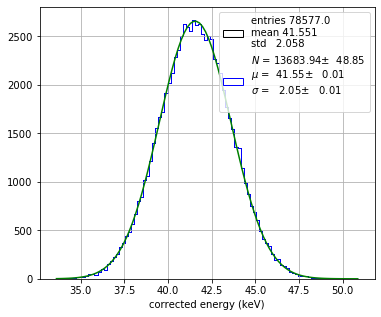

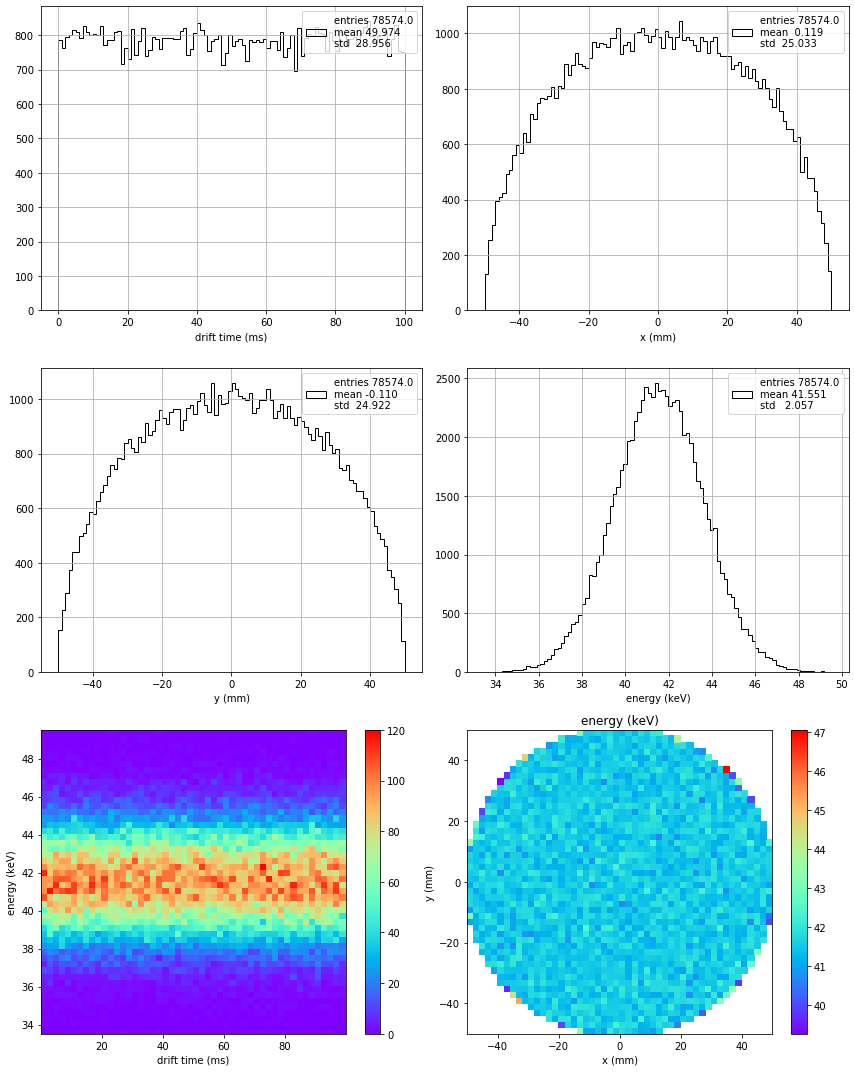

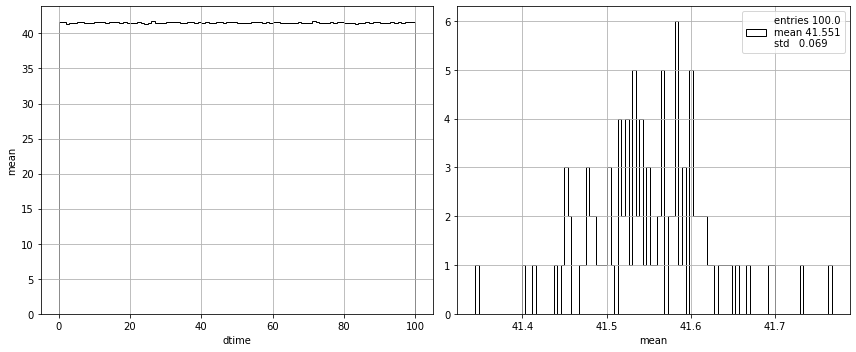

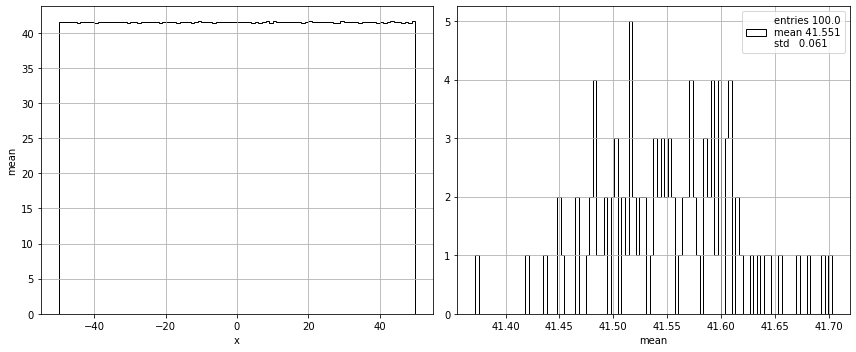

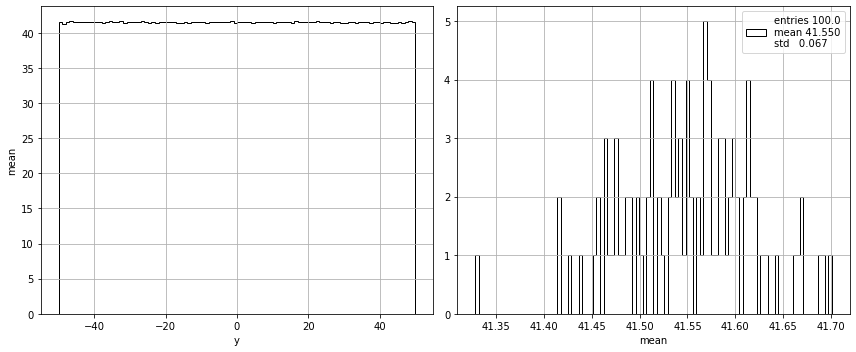

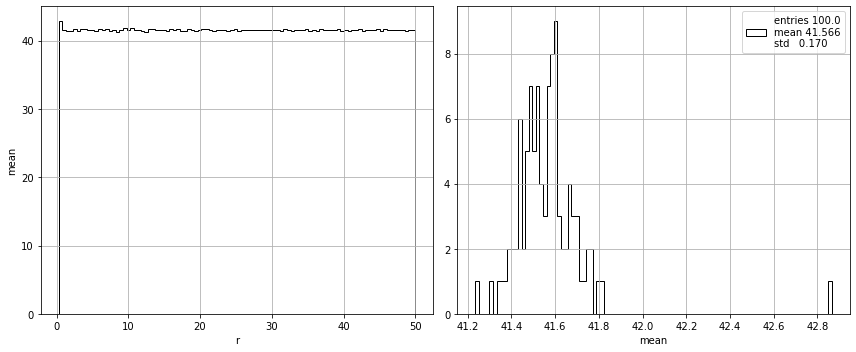

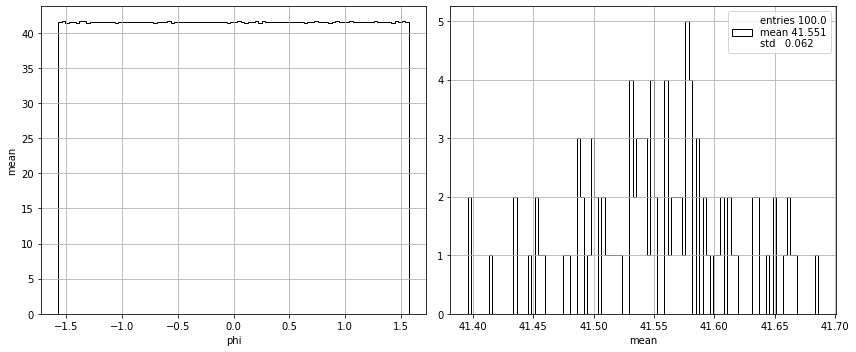

In [440]:
plot_run(df, krmap, residuals, cene)